In [2]:
import pandas as pd
import seaborn as sns


In [3]:
data = pd.read_csv('NIPS_1987-2015.csv')
data.head()

,Word,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(11463, 5812)

In [5]:
features = [x for x in data.columns if x!='Word']
X = data[features]
y = data['Word']
X.head()

,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,1987_10,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head()

0        abalone
1         abbeel
2         abbott
3     abbreviate
4    abbreviated
Name: Word, dtype: object

In [7]:
print(X.sum(0))

1987_1       787
1987_2      2167
1987_3      1171
1987_4      1582
1987_5      2275
            ... 
2015_399    2214
2015_400    1534
2015_401    2141
2015_402    2090
2015_403    2050
Length: 5811, dtype: int64


[Text(0, 0.5, 'Papers'), Text(0.5, 0, 'Word Count')]

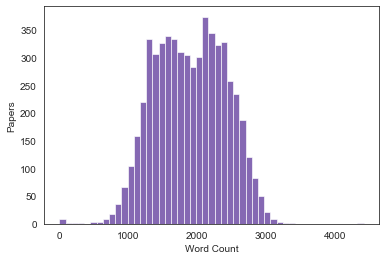

In [8]:
sns.set_palette('twilight_shifted')
sns.set_style('white')
sns.histplot(X.sum(0)).set(xlabel='Word Count', ylabel='Papers')


[Text(0, 0.5, 'Papers'), Text(0.5, 0, 'Word Count')]

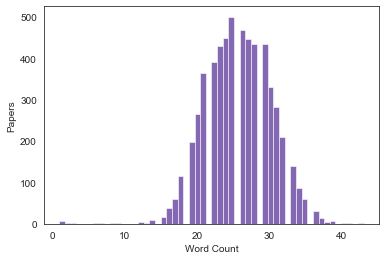

In [9]:
sns.histplot(X.nunique(0)).set(xlabel='Word Count', ylabel='Papers')

In [10]:
from numpy import log1p
X_scaled = log1p(X)

In [11]:
X_scaled.head()
print(X_scaled.sum(0))


1987_1      369.949508
1987_2      935.508992
1987_3      507.473464
1987_4      664.648712
1987_5      924.223739
               ...    
2015_399    876.659492
2015_400    644.074497
2015_401    771.423880
2015_402    759.163080
2015_403    782.751663
Length: 5811, dtype: float64


In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
'''
inertias = []
test_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_number_clusters = []
for i in test_n_clusters:
    x_number_clusters.append(i)
    est = KMeans(n_clusters = i)
    est.fit(X=X_scaled)
    inertias.append(est.inertia_)
    sns.lineplot(x_number_clusters,inertias).set(xlabel='Number of Clusters', ylabel='Inertia')
    plt.show()
    print(i)

'''

"\ninertias = []\ntest_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]\nx_number_clusters = []\nfor i in test_n_clusters:\n    x_number_clusters.append(i)\n    est = KMeans(n_clusters = i)\n    est.fit(X=X)\n    inertias.append(est.inertia_)\n    sns.lineplot(x_number_clusters,inertias).set(xlabel='Number of Clusters', ylabel='Inertia')\n    plt.show()\n    print(i)\n\n"

In [13]:
kmeans = KMeans(n_clusters = 13)
kmeans_pred = kmeans.fit_predict(X_scaled)
y_kmeans_pred = pd.DataFrame(y, kmeans_pred)
print(kmeans.inertia_0)

SyntaxError: unexpected EOF while parsing (<ipython-input-13-93b0e9b84f3e>, line 4)

In [75]:
print(type(kmeans_pred))
type(y)

<class 'numpy.ndarray'>


pandas.core.series.Series

In [76]:
kmeans_pred = pd.DataFrame(kmeans_pred)


In [78]:
y= pd.DataFrame(y)
y.head()

,Word
0,abalone
1,abbeel
2,abbott
3,abbreviate
4,abbreviated


In [79]:
y_kmeans_pred = y.join(kmeans_pred)


In [80]:
y_kmeans_pred.head()

,Word,0
0,abalone,8
1,abbeel,8
2,abbott,8
3,abbreviate,8
4,abbreviated,8


In [86]:
y_kmeans_pred.rename(columns={"Word":"Word",0:"Class"}, inplace=True)

In [87]:
y_kmeans_pred['Class'].value_counts()

8     8625
9     1413
10     427
1      378
0      240
5      141
7       88
2       42
11      31
4       25
3       25
6       18
12      10
Name: Class, dtype: int64

In [92]:
display_classes = [12,6,3,4,11,2]
for i in display_classes:
    print(y_kmeans_pred[y_kmeans_pred['Class']==i])


              Word  Class
3681       feature     12
3682      features     12
4671         image     12
4675        images     12
5587         learn     12
5590       learned     12
6890        object     12
8316   recognition     12
10666      trained     12
10667     training     12
            Word  Class
286    algorithm      6
330         also      6
876        based      6
2385        data      6
3725      figure      6
3772       first      6
3996    function      6
4158       given      6
5593    learning      6
6369       model      6
6866      number      6
7903     problem      6
8683     results      6
9226         set      6
10533       time      6
11020        use      6
11021       used      6
11028      using      6
            Word  Class
664       assume      3
1145       bound      3
1151      bounds      3
1989    consider      3
2010    constant      3
2479      define      3
2480     defined      3
2547      denote      3
3856     follows      3
4002   functions  

In [16]:
from sklearn.cluster import AgglomerativeClustering
HAC = AgglomerativeClustering(n_clusters = None, affinity='cosine',linkage = 'average',distance_threshold = 1)
y_pred_HAC = HAC.fit_predict(X)
y_pred_HAC.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [19]:
y_pred_HAC = pd.DataFrame(y).join(pd.DataFrame(y_pred_HAC))
y_pred_HAC.head()

ValueError: columns overlap but no suffix specified: Index(['Word'], dtype='object')

In [21]:
y_pred_HAC.rename(columns={"Word":"Word",0:"Class"}, inplace=True)


In [23]:
y_pred_HAC['Class'].value_counts()

0    11463
Name: Class, dtype: int64